[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drdave-teaching/OPIM5509Files/blob/main/OPIM5509_Module1_Files/2_AllTheModels_BostonHousing_Regression.ipynb)

# All the Models with Boston Housing **(Regression)**
-----------------------
**Dr. Dave Wanik**

## Getting started
Import modules, mount Drive, read in the data, check data types and missing values. You may also do some light EDA prior to modeling.

Notice how we are using the same code over and over again (regardless of model)... it really is like following a recipe. You just need to know how to copy/paste and update the names. Proficiency will come with practice.


In [ ]:
# import modules we need for EDA and wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# these functions are useful for splitting and normalization
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split

# import other functions we'll need for regression modeling
from sklearn.linear_model import LinearRegression # LR
from sklearn.tree import DecisionTreeRegressor # DTR
from sklearn.ensemble import RandomForestRegressor # RFR
from sklearn.ensemble import GradientBoostingRegressor #GBR

# regression error metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# # mount your google drive
# from google.colab import drive
# drive.mount('/content/drive')
# read in some data
# df = pd.read_csv('/content/drive/My Drive/OPIM 5509/Module 1: Python Bootcamp/Data/BostonHousing.csv')

In [ ]:
# Read from shareable link
# https://drive.google.com/file/d/1ftXw37thrjI7NwPuDvm_HsOtNiSAOL1z/view?usp=sharing
# !gdown 1ftXw37thrjI7NwPuDvm_HsOtNiSAOL1z
# df = pd.read_csv('BostonHousing.csv')

# Link to the CSV file on Github
url = "https://raw.githubusercontent.com/drdave-teaching/OPIM5509Files/refs/heads/main/OPIM5509_Module1_Files/BostonHousing.csv"

# Read the data into a DataFrame
df = pd.read_csv(url)

In [ ]:
# data type, shape and columns

print("This is the shape :\n", df.shape, '\n') # escape characters are fun! \n adds a return line
print("These are the column names: \n", df.columns, '\n') # helps keep things nice and clean
print("These are the data types: \n", df.dtypes)

# right away you see this 'valid' column is an 'object', which means it's a string
# AKA something you can't do math on... look at the head and see what's going on
# in that column. ALL OTHER DATA IS NUMERIC (float64)

print("\nThis is the head:") # see how I can pop that \n anywhere?
df.head()   # also note how much stuff I have pasted in ONE CELL...
            # now you are cooking with gas!

# the head confirms to use that the valid column is some type of time/date stamp
# we need to stop what we are doing and take care of this NOW!

This is the shape :
 (506, 14) 

These are the column names: 
 Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object') 

These are the data types: 
 crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

This is the head:


crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [ ]:
# here's another cool way to get a lot of this info AND MORE
df.info() # gives you missing values report too - this is nice complete data

# data types, shape, missing values per columm.... pandas rocks...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## Data splitting
Subset your data into X features and Y target variable for modeling. Convert X and Y to numpy arrays. Then use train_test_split for data splitting (80/20 is very common); don't forget random seed and shuffle.

In [ ]:
# the target variable is Y
# we know that this is 'medv'
Y = df['medv']
print(Y.shape) # a single column with 506 rows

(506,)


In [ ]:
# everything else is X
# so just drop 'medv' and you are done
X = df.drop('medv', axis=1)
print(X.shape) # note that we have gone from 14 to 13 columns, this is good! 506 rows.

(506, 13)


In [ ]:
# now, split the data in ONE LINE OF CODE
# notice how we are assigning four different variables at once
# this makes it really clean

# be careful of capital vs. lowercase X and Y, you might get an error...
# notice the 80/20 split we perform

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 42)

In [ ]:
# check your work - does the shape match what you think it should be?
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [ ]:
# convert these all to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Min/Max Scaling
This will ensure all of your X data is between 0 (min) and 1 (max). You will use fit_transform() on the train data first, then fit on the test data. If you don't do this step after splitting, you will have data leakage.

Only scale the X data, not the Y data!

Do yourself a favor and just overwrite X_train and X_test when standardizing, as I do below. Min/max scaling requires that the data are numpy arrays and all numeric data.


**Like this example:**
```
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
```


In [ ]:
# you probably have already imported the MinMaxScale at the top of your script
# you should convert to numpy array before scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# if you wanted to run summary stats on these to check the range,
# you would need to convert to a pandas dataframe.
tmp = pd.DataFrame(X_train)
tmp.describe() # notice how all the max values are 1, all min values are 0.

0           1           2           3           4           5   \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     0.040465    0.115693    0.379446    0.071782    0.352848    0.498859   
std      0.099757    0.231525    0.255356    0.258447    0.242190    0.144285   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000814    0.000000    0.162593    0.000000    0.137860    0.412345   
50%      0.002836    0.000000    0.289630    0.000000    0.314815    0.477324   
75%      0.035900    0.200000    0.642963    0.000000    0.506173    0.564114   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               6           7           8           9           10          11  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     0.676173    0.243577    0.363323    0.414184    0.608332    0.897570   
std      0.288310    0.193802    0.373466    0.317123    0.237096    0.230890   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.439238    0.087140    0.130435    0.175573    0.446809    0.945969   
50%      0.770340    0.186066    0.173913    0.272901    0.648936    0.985892   
75%      0.934604    0.388400    0.478261    0.914122    0.808511    0.997113   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               12  
count  404.000000  
mean     0.296009  
std      0.196203  
min      0.000000  
25%      0.139142  
50%      0.253725  
75%      0.404042  
max      1.000000

## Fit The Model
Fit the model and make new variables to save your train and test predictions. Make sure you are using the appropriate regression or classification model.

Notice how we're using the same training data and test data for each model - this is critical!

Also note that in many StackOverflow examples, folks don't use 'DTR' or 'LR' as variable names for their models - instead, they often use 'clf' which stands for classifier. Helps you abstract what's going on.

### Linear Regression

In [ ]:
# make a variable to store the general model
LR = LinearRegression()
# fit the model - one line of code
LR = LR.fit(X_train, y_train)

In [ ]:
# store the predictions
train_preds_LR = LR.predict(X_train)
test_preds_LR = LR.predict(X_test)

### DTR

Check out the model documentation:

**DTR Model Documentation:** https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html


Some extra content to think about...

**Link:** https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

**Link:** https://scikit-learn.org/stable/modules/tree.html

In [ ]:
# make a variable to store the general model
# you can accept all of the defaults...
DTR = DecisionTreeRegressor()
# or start to 'tinker' :) this is called hyperparameter tuning
# DTR = DecisionTreeRegressor(min_samples_split=15) # make this bigger and the tree will shrink!

# fit the model - one line of code
DTR = DTR.fit(X_train, y_train)

In [ ]:
# store the predictions
train_preds_DTR = DTR.predict(X_train)
test_preds_DTR = DTR.predict(X_test)

In [ ]:
# show the tree
# link: https://www.datacamp.com/community/tutorials/decision-tree-classification-python
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(DTR, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# hard to see, but that's OK!
# we will learn about partial depenence
# and feature importance with is way easier to see than this

# for now, just appreciate how awesome this looks!
# double click and you can see

### RFR
Random Forest Regressor

In [ ]:
# make a variable to store the general model
# you can accept all of the defaults...
RFR = RandomForestRegressor()
# or start to 'tinker' :) this is called hyperparameter tuning
# DTR = DecisionTreeRegressor(min_samples_split=15) # make this bigger and the tree will shrink!

# fit the model - one line of code
RFR = RFR.fit(X_train, y_train)

In [ ]:
# store the predictions
train_preds_RFR = RFR.predict(X_train)
test_preds_RFR = RFR.predict(X_test)

## Evaluate the Model
Look at the appropriate error metrics depending on the problem you are solving.

For a regression problem, look at the R2, MAE and MSE; then make a scatterplot of actual vs. predicted values with nice labels and titles.

For a classification problem, create the classification report (gives a confusion matrix and useful metrics in one line of code).

See how we are just tacking on a suffix like '_LR' or '_DTR' on the end of things? Keep your code clean and you can just copy paste. Same stuff as before, but we need to be organized since we are introducing more models.

### R2
Out of all of these, random forest is the most believable! Did not memorize the training data and has consistent results between train and test results. In practice - we only really care about the test results.

In [ ]:
# this is a regression problem, and there are three metrics to look at.
# 1) R2 value - for Linear Regression
print("This is train R2 (LR):", r2_score(y_train, train_preds_LR)) # train
print("This is test R2 (LR):", r2_score(y_test, test_preds_LR)) # test

# 1) R2 value - for Decision Tree Regression
print("This is train R2 (DTR):", r2_score(y_train, train_preds_DTR)) # train
print("This is test R2 (DTR):", r2_score(y_test, test_preds_DTR)) # test

# 1) R2 value - for Random Forest Regression
print("This is train R2 (RFR):", r2_score(y_train, train_preds_RFR)) # train
print("This is test R2 (RFR):", r2_score(y_test, test_preds_RFR)) # test

This is train R2 (LR): 0.7508856358979673
This is test R2 (LR): 0.6687594935356322
This is train R2 (DTR): 1.0
This is test R2 (DTR): 0.8671117777037858
This is train R2 (RFR): 0.9787192796950184
This is test R2 (RFR): 0.8832862255484749


### MAE
Again, RFR is the champ here - best test results!

In [ ]:
# 2) mae - for Linear Regression
trainMAE_LR = mean_absolute_error(y_train, train_preds_LR)
print("This is trainMAE (LR):", trainMAE_LR) # train
testMAE_LR = mean_absolute_error(y_test, test_preds_LR)
print("This is testMAE (LR):", testMAE_LR) # test

# 2) mae - for DT Regression
trainMAE_DTR = mean_absolute_error(y_train, train_preds_DTR)
print("This is trainMAE (DTR):", trainMAE_DTR) # train
testMAE_DTR = mean_absolute_error(y_test, test_preds_DTR)
print("This is testMAE (DTR):", testMAE_DTR) # test

# 2) mae - for RF Regression
trainMAE_RFR = mean_absolute_error(y_train, train_preds_RFR)
print("This is trainMAE (RFR):", trainMAE_RFR) # train
testMAE_RFR = mean_absolute_error(y_test, test_preds_RFR)
print("This is testMAE (RFR):", testMAE_RFR) # test

This is trainMAE (LR): 3.314771626783231
This is testMAE (LR): 3.189091965887846
This is trainMAE (DTR): 0.0
This is testMAE (DTR): 2.31078431372549
This is trainMAE (RFR): 0.8707079207920797
This is testMAE (RFR): 2.0691176470588233


### MSE
If you see an MSE of 0, this means a perfect prediction - this should NEVER happen... there should always be at least a little bit of error in your train results, otherwise you are OVERFITTING. You need to play with the hyperparameters (we will do this in future weeks).

In [ ]:
# 3) mse
trainMSE_LR = mean_squared_error(y_train, train_preds_LR)
print("This is trainMSE (LR):", trainMSE_LR)
testMSE_LR = mean_squared_error(y_test, test_preds_LR)
print("This is testMSE (LR):", testMSE_LR)

# 3) mse
trainMSE_DTR = mean_squared_error(y_train, train_preds_DTR)
print("This is trainMSE (DTR):", trainMSE_DTR)
testMSE_DTR = mean_squared_error(y_test, test_preds_DTR)
print("This is testMSE (DTR):", testMSE_DTR)

# 3) mse
trainMSE_RFR = mean_squared_error(y_train, train_preds_RFR)
print("This is trainMSE (RFR):", trainMSE_RFR)
testMSE_RFR = mean_squared_error(y_test, test_preds_RFR)
print("This is testMSE (RFR):", testMSE_RFR)

This is trainMSE (LR): 21.641412753226312
This is testMSE (LR): 24.291119474973502
This is trainMSE (DTR): 0.0
This is testMSE (DTR): 9.745196078431372
This is trainMSE (RFR): 1.8487286089108916
This is testMSE (RFR): 8.55906262745098


## LR predictions
This is a simpler model, and it has different error than the Decision Tree model!

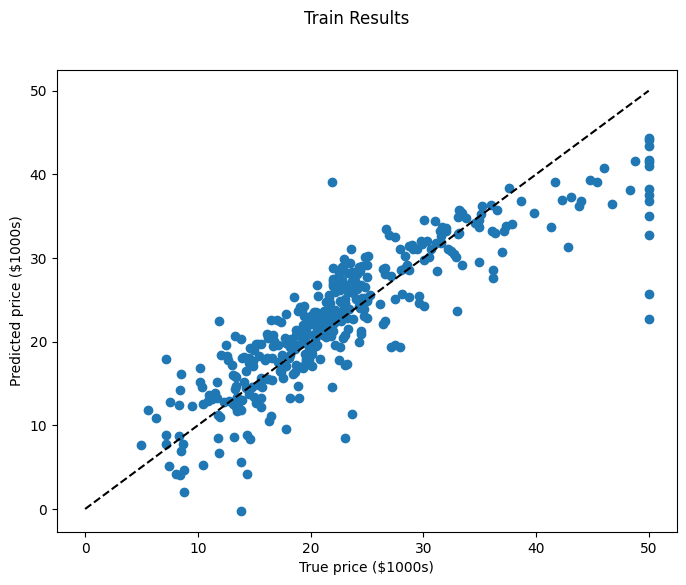

In [ ]:
# a quick scatterplot for train results
# let's see how it fit
plt.figure(figsize=(8, 6))
plt.scatter(x=y_train, y=train_preds_LR)
plt.plot([0, 50], [0, 50], '--k') # 45 degree line
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.suptitle('Train Results')
plt.show()

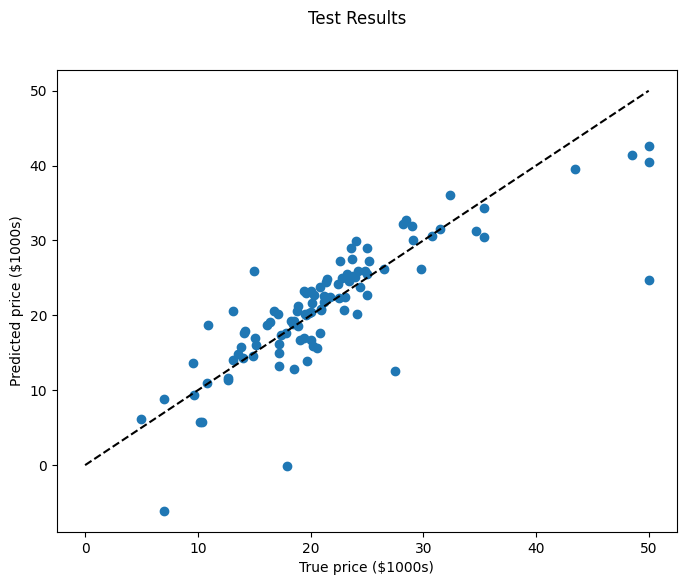

In [ ]:
# a quick scatterplot for test results
# same code as above, just different labels
# a quick scatterplot for train results
# let's see how it fit
plt.figure(figsize=(8, 6))
plt.scatter(x=y_test, y=test_preds_LR)
plt.plot([0, 50], [0, 50], '--k') # 45 degree line
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.suptitle('Test Results')
plt.show()

## DTR Results
Look at how each has a different flavor...

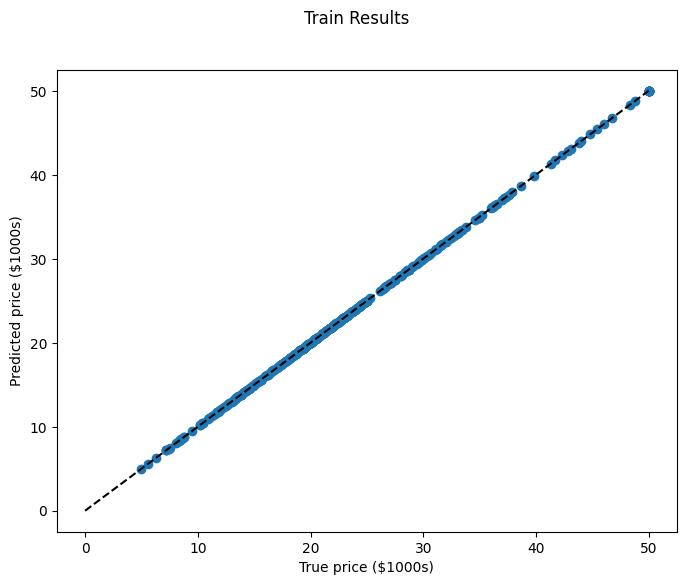

In [ ]:
# a quick scatterplot for train results
# let's see how it fit
plt.figure(figsize=(8, 6))
plt.scatter(x=y_train, y=train_preds_DTR)
plt.plot([0, 50], [0, 50], '--k') # 45 degree line
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.suptitle('Train Results')
plt.show()

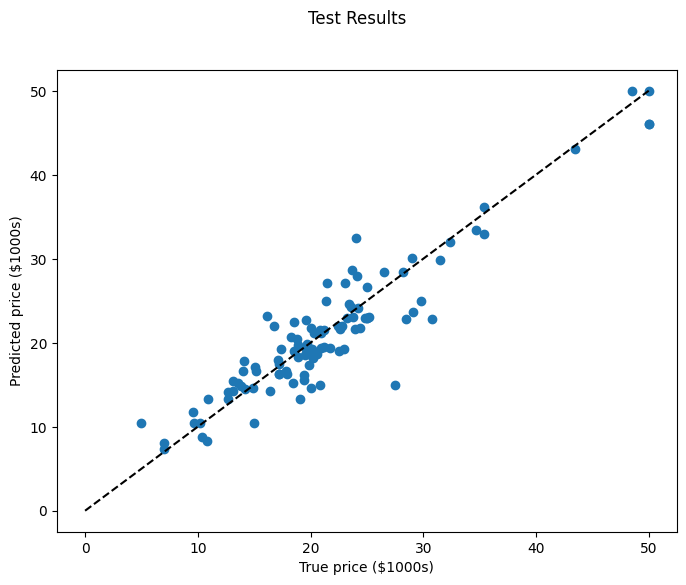

In [ ]:
# a quick scatterplot for test results
# same code as above, just different labels
# a quick scatterplot for train results
# let's see how it fit
plt.figure(figsize=(8, 6))
plt.scatter(x=y_test, y=test_preds_DTR)
plt.plot([0, 50], [0, 50], '--k') # 45 degree line
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.suptitle('Test Results')
plt.show()

## Sub-Plots
Way cleaner! Try doing the plots side-by-side.

### LR Results

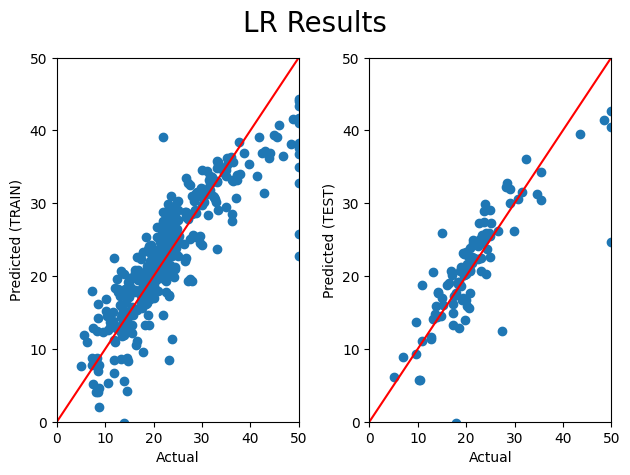

In [ ]:
# specify the dimensions
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# fig limits


# add a main title across top
fig.suptitle("LR Results", fontsize=20)

# this makes the individual subplots
axes[0].scatter(x=y_train, y=train_preds_LR) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)
# set plot limits
axes[0].set_xlim(0,50)
axes[0].set_ylim(0,50)
# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')


axes[1].scatter(x=y_test, y=test_preds_LR) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted (TEST)",  fontsize=10)
# set plot limits
axes[1].set_xlim(0,50)
axes[1].set_ylim(0,50)
# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# scooch it down
# link: https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot
fig.subplots_adjust(top=0.88)

# show the plot
plt.show()

### DTR Results

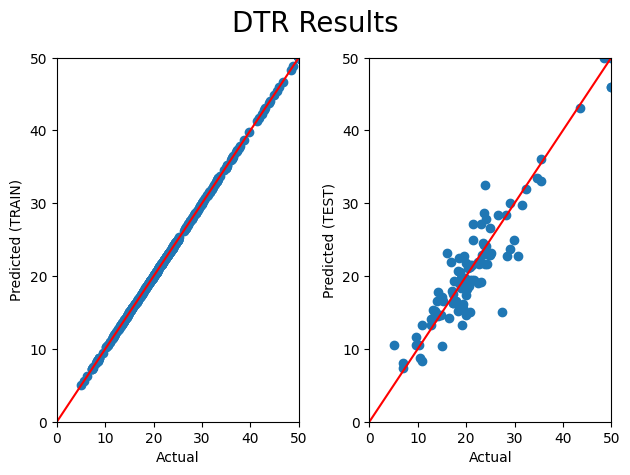

In [ ]:
# specify the dimensions
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# fig limits


# add a main title across top
fig.suptitle("DTR Results", fontsize=20)

# this makes the individual subplots
axes[0].scatter(x=y_train, y=train_preds_DTR) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)
# set plot limits
axes[0].set_xlim(0,50)
axes[0].set_ylim(0,50)
# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')


axes[1].scatter(x=y_test, y=test_preds_DTR) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted (TEST)",  fontsize=10)
# set plot limits
axes[1].set_xlim(0,50)
axes[1].set_ylim(0,50)
# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# scooch it down
# link: https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot
fig.subplots_adjust(top=0.88)

# show the plot
plt.show()

### RFR Results

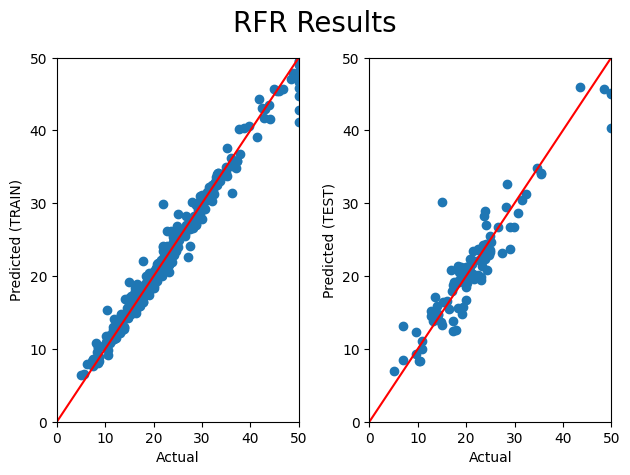

In [ ]:
# specify the dimensions
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# fig limits


# add a main title across top
fig.suptitle("RFR Results", fontsize=20)

# this makes the individual subplots
axes[0].scatter(x=y_train, y=train_preds_RFR) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)
# set plot limits
axes[0].set_xlim(0,50)
axes[0].set_ylim(0,50)
# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')


axes[1].scatter(x=y_test, y=test_preds_RFR) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted (TEST)",  fontsize=10)
# set plot limits
axes[1].set_xlim(0,50)
axes[1].set_ylim(0,50)
# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# scooch it down
# link: https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot
fig.subplots_adjust(top=0.88)

# show the plot
plt.show()

# Done!
The DTR model overfits the training data a little bit, but we will let that be for now. The RFR model seems to do better - it actually learned to generalize the info from the train results and make a more stable test prediction.

As before, if you want, try updating some of the hyperparameters so that you get a little more scatter along the 45 degree line. For a DTR, you may consider


*   min_samples_leaf
*   min_samples_split

For example, by making min_samples_leaf = 15, you force the terminal nodes/leafs to have 15 rows in them, instead of 1! This is much more robust.

Check slides and model documentation for other ideas!



In [ ]:
# import pkg_resources
# import types
# def get_imports():
#     for name, val in globals().items():
#         if isinstance(val, types.ModuleType):
#             # Split ensures you get root package,
#             # not just imported function
#             name = val.__name__.split(".")[0]

#         elif isinstance(val, type):
#             name = val.__module__.split(".")[0]

#         # Some packages are weird and have different
#         # imported names vs. system/pip names. Unfortunately,
#         # there is no systematic way to get pip names from
#         # a package's imported name. You'll have to add
#         # exceptions to this list manually!
#         poorly_named_packages = {
#             "PIL": "Pillow",
#             "sklearn": "scikit-learn"
#         }
#         if name in poorly_named_packages.keys():
#             name = poorly_named_packages[name]

#         yield name
# imports = list(set(get_imports()))

# # The only way I found to get the version of the root package
# # from only the name of the package is to cross-check the names
# # of installed packages vs. imported packages
# requirements = []
# for m in pkg_resources.working_set:
#     if m.project_name in imports and m.project_name!="pip":
#         requirements.append((m.project_name, m.version))

# for r in requirements:
#     print("{}=={}".format(*r))

# # Save to requirements.txt
# with open("requirements.txt", "w") as file:
#     for n in requirements:
#         file.write("{}=={}\n".format(*n))

# print("requirements.txt has been created in the current directory!")